# Intro to CNNs



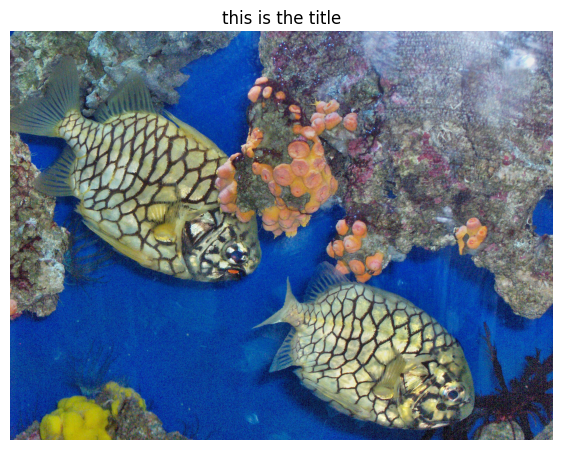

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, util, color, exposure

# Load an example image
image_url = "https://upload.wikimedia.org/wikipedia/commons/8/8b/Monaco.Mus%C3%A9e_oc%C3%A9anographique022.jpg"
image = io.imread(image_url)

# Function to display images
def display_image(image, title):
  plt.figure(figsize=(7, 7))
  plt.title(title)
  plt.imshow(image)
  plt.axis('off')
  plt.show()
display_image(image, "this is the title")


## Augmenting Images


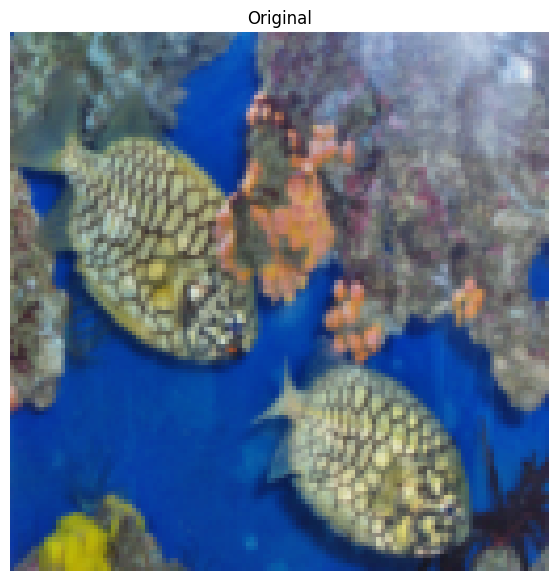

In [2]:
# Original Image
original_image = transform.resize(image, (128, 128), mode='reflect', anti_aliasing=True)

display_image(original_image, 'Original')

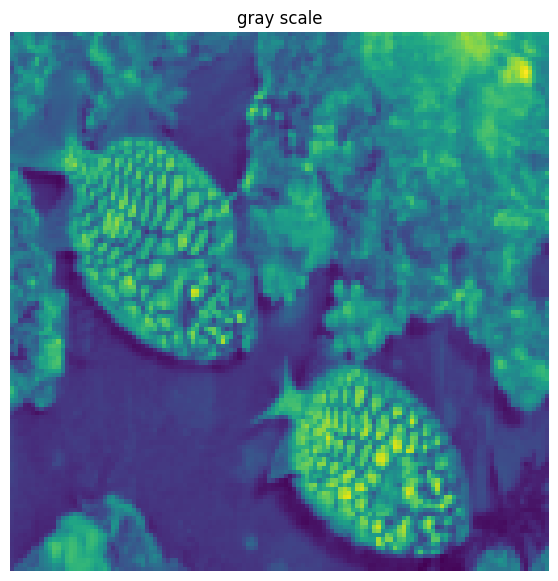

In [3]:
gray_image = color.rgb2gray(original_image)

display_image(gray_image, 'gray scale')

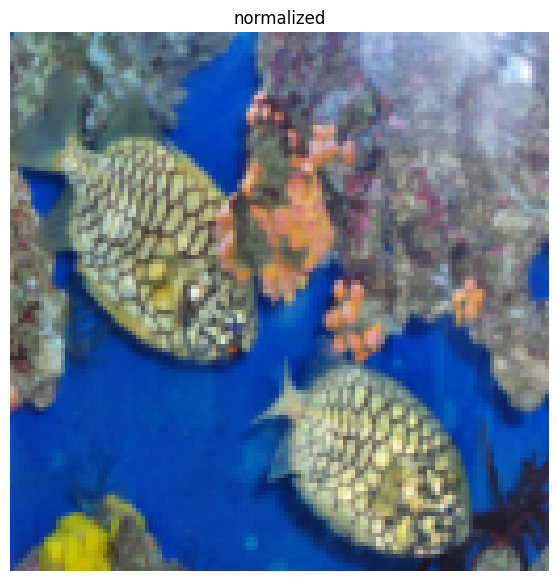

In [4]:
normalized_image = exposure.rescale_intensity(original_image, out_range=(0, 1))

display_image(normalized_image, 'normalized')

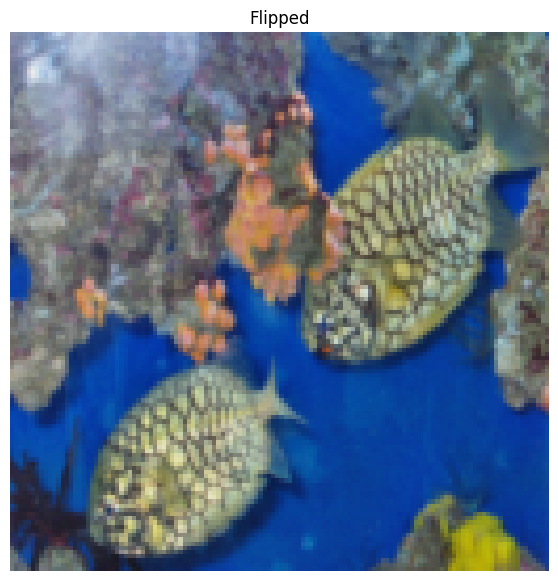

In [5]:
flipped_image = np.fliplr(original_image)

display_image(flipped_image, 'Flipped')

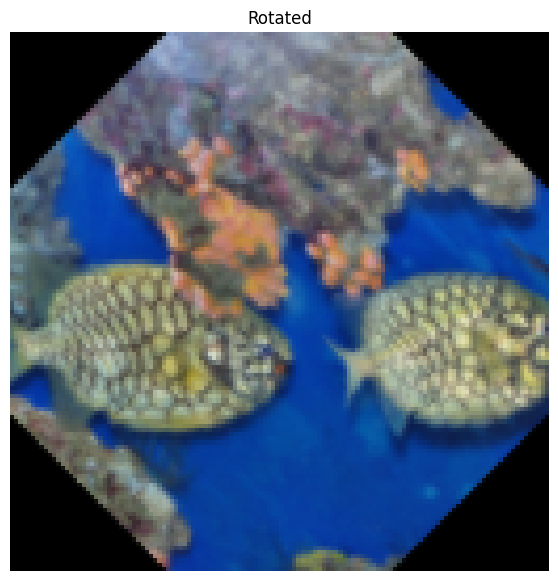

In [6]:
rotated_image = transform.rotate(original_image, angle=45)

display_image(rotated_image, 'Rotated')

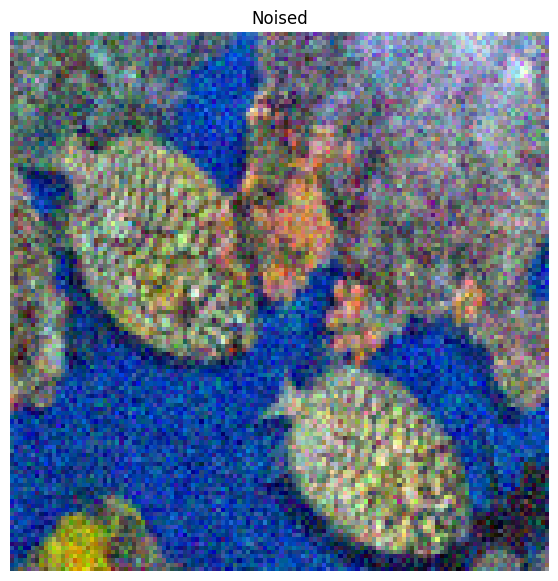

In [7]:
noisy_image = util.random_noise(original_image)

display_image(noisy_image, 'Noised')

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


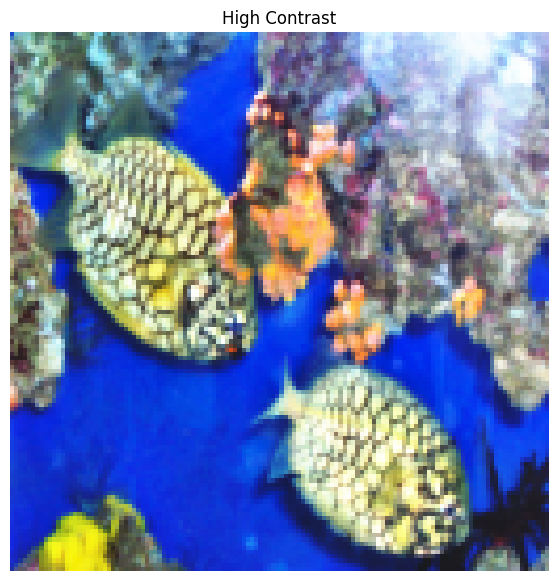

In [8]:
high_contrast_image = exposure.equalize_hist(original_image)

display_image(high_contrast_image, 'High Contrast')

## Basic CNN using PyTorch

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define a simple CNN model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding = 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(4096 , 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        print(x.shape)
        x = x.view(-1, 16 * 16 * 16)
        # x = torch.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load and preprocess the CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

# Initialize the model and optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Training loop
for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}')

print('Finished Training')

Files already downloaded and verified
torch.Size([64, 16, 16, 16])
torch.Size([64, 10])
torch.Size([64, 16, 16, 16])
torch.Size([64, 10])
torch.Size([64, 16, 16, 16])
torch.Size([64, 10])
torch.Size([64, 16, 16, 16])
torch.Size([64, 10])
torch.Size([64, 16, 16, 16])
torch.Size([64, 10])
torch.Size([64, 16, 16, 16])
torch.Size([64, 10])
torch.Size([64, 16, 16, 16])
torch.Size([64, 10])
torch.Size([64, 16, 16, 16])
torch.Size([64, 10])
torch.Size([64, 16, 16, 16])
torch.Size([64, 10])
torch.Size([64, 16, 16, 16])
torch.Size([64, 10])
torch.Size([64, 16, 16, 16])
torch.Size([64, 10])
torch.Size([64, 16, 16, 16])
torch.Size([64, 10])
torch.Size([64, 16, 16, 16])
torch.Size([64, 10])
torch.Size([64, 16, 16, 16])
torch.Size([64, 10])
torch.Size([64, 16, 16, 16])
torch.Size([64, 10])
torch.Size([64, 16, 16, 16])
torch.Size([64, 10])
torch.Size([64, 16, 16, 16])
torch.Size([64, 10])
torch.Size([64, 16, 16, 16])
torch.Size([64, 10])
torch.Size([64, 16, 16, 16])
torch.Size([64, 10])
torch.Size([

KeyboardInterrupt: ignored